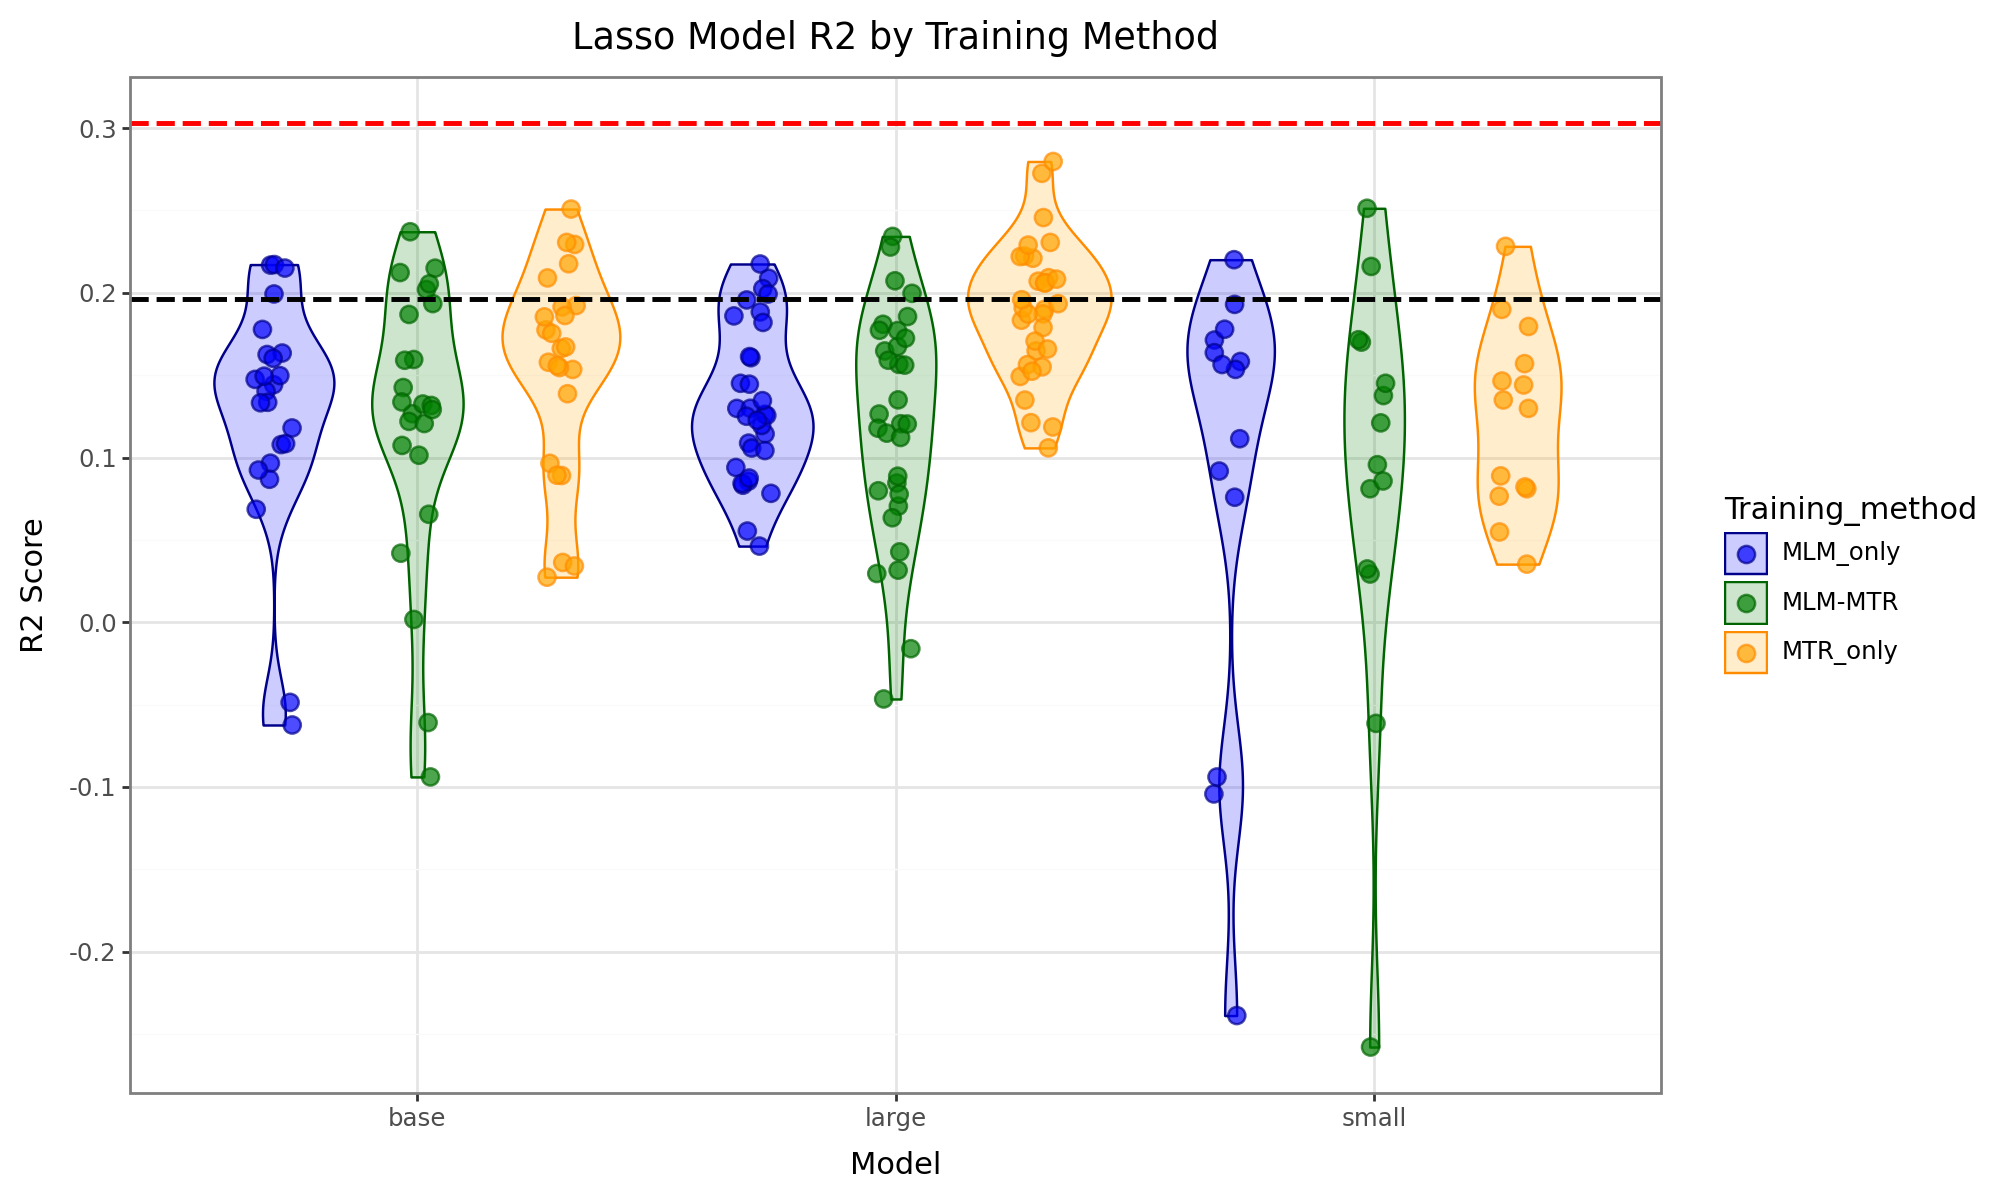

In [36]:
import pandas as pd
import plotnine as p9

# read df lasso_predictions.csv

df = pd.read_csv('lasso_predictions.csv')

# 1. Ensure Categorical ordering is correct
df['Training_method'] = pd.Categorical(
    df['Training_method'], 
    categories=['MLM_only', 'MLM-MTR', 'MTR_only'], 
    ordered=True
)

line_labels = {
    'line_0.303': 'Reference 1 (0.303)',
    'line_0.196': 'Baseline (0.196)'
}
line_colors = {
    'line_0.303': 'darkred',
    'line_0.196': 'grey'
}

# 2. Define Palette
palette = {'MLM_only': 'blue', 'MLM-MTR': 'green', 'MTR_only': 'orange'}
dark_palette = {'MLM_only': 'darkblue', 'MLM-MTR': 'darkgreen', 'MTR_only': 'darkorange'}

# 3. Plot
p = (p9.ggplot(df, p9.aes(x='Model', y='R2', color='Training_method', fill='Training_method'))
     # Map both Color (points/outline) and Fill (violin body) to the palette
     + p9.scale_color_manual(values=dark_palette)
     + p9.scale_fill_manual(values=palette)
     
     # Violin: Use position_dodge so different methods don't overlap on the same X tick
     + p9.geom_violin(p9.aes(fill='Training_method'), trim=True, alpha=0.2, position=p9.position_dodge(width=0.9))
     
     # Jitter: Replacement for geom_sina. Use dodge to align with violins
     + p9.geom_jitter(position=p9.position_jitterdodge(jitter_width=0.2, dodge_width=0.9), size=3, alpha=0.7)
     
     # Reference lines
     + p9.geom_hline(yintercept=0.303, linetype='dashed', color='red', size=1)
     + p9.geom_hline(yintercept=0.196, linetype='dashed', color='black', size=1)
     
     # Theme and labels
     + p9.theme_bw()
     + p9.labs(title='Lasso Model R2 by Training Method', x='Model', y='R2 Score')
     + p9.theme(figure_size=(10, 6))
    )

p

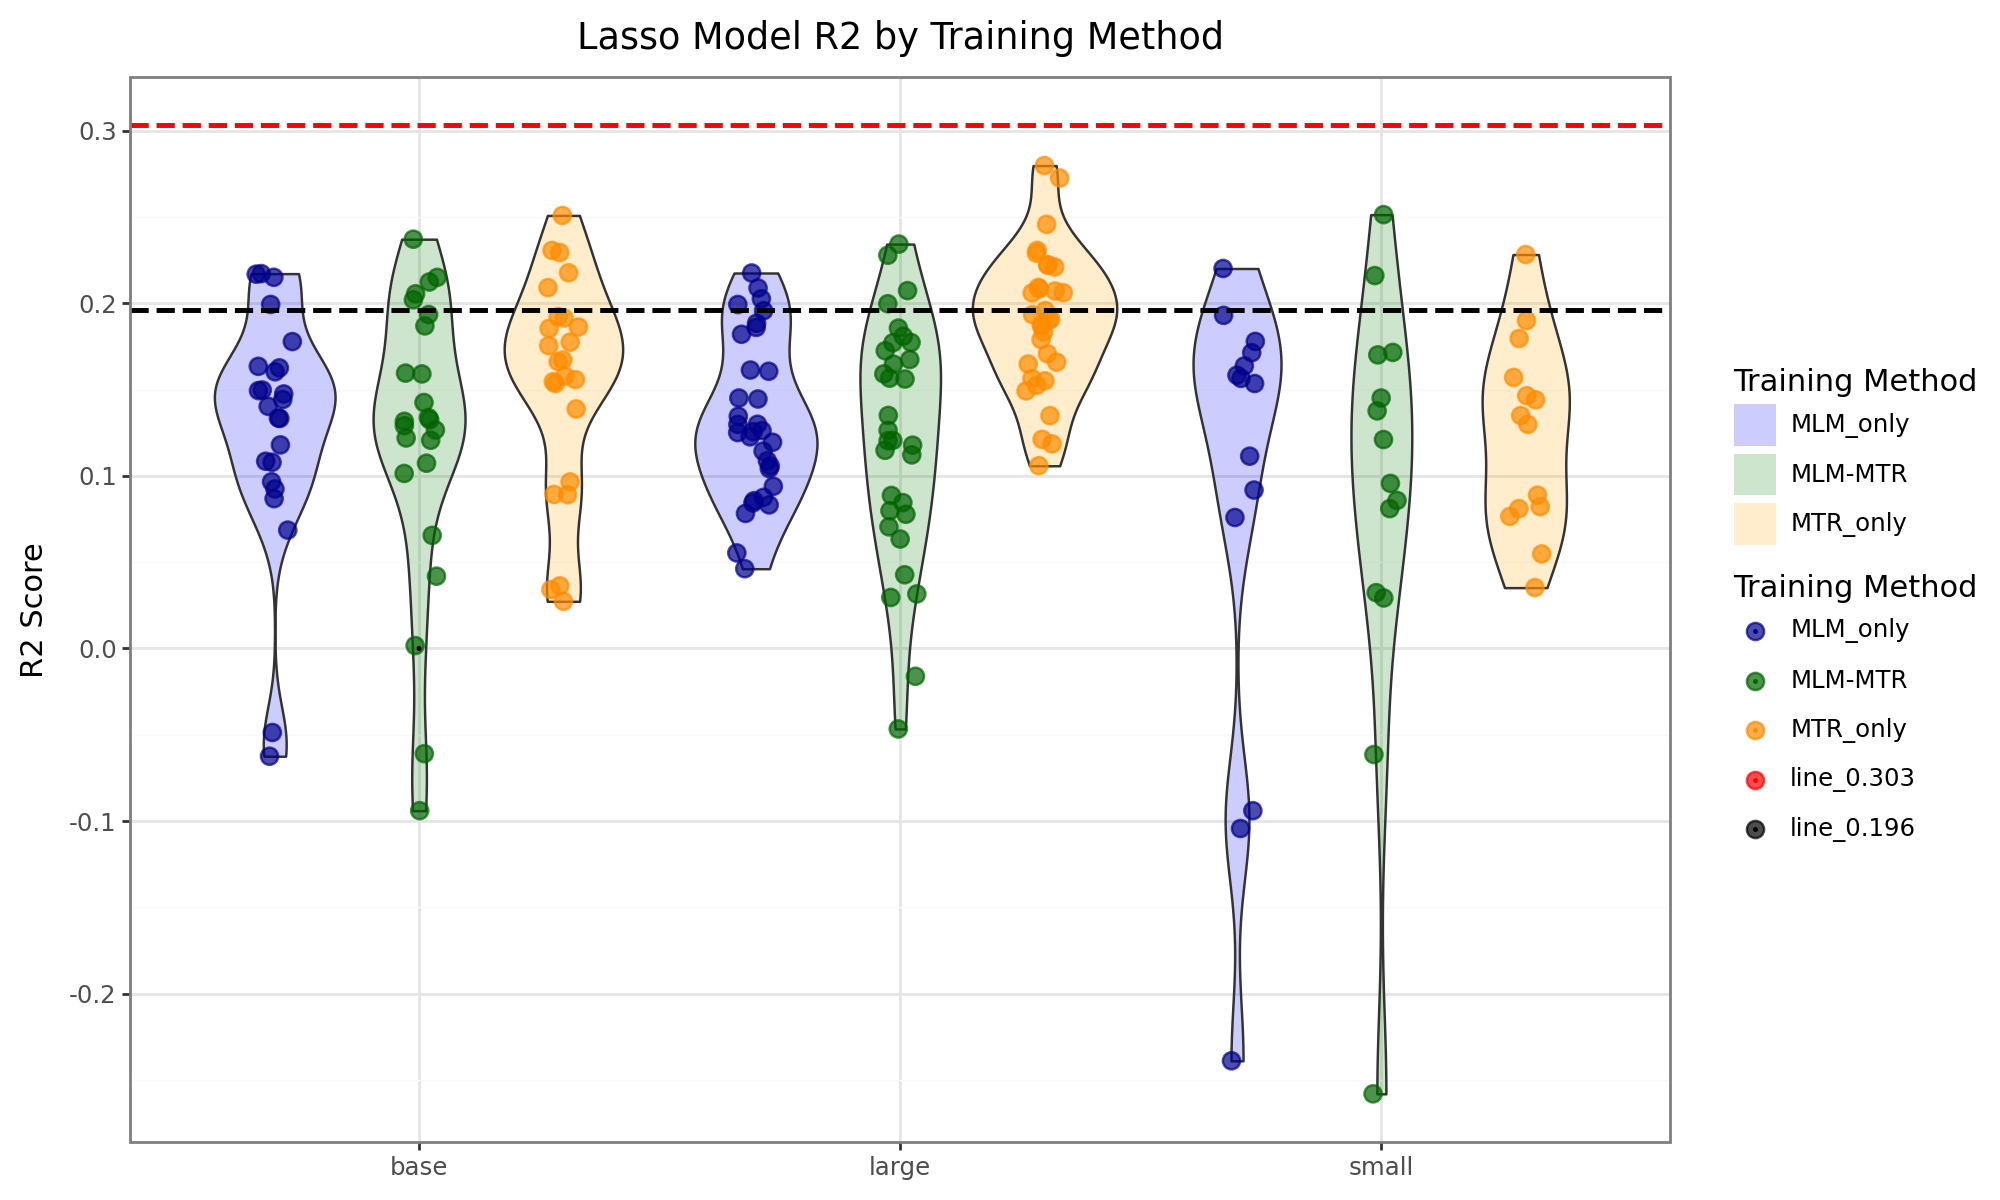

In [70]:
import pandas as pd
import plotnine as p9

# Assume 'lasso_predictions.csv' is in the working directory
try:
    df = pd.read_csv('lasso_predictions.csv')
except FileNotFoundError:
    print("Warning: 'lasso_predictions.csv' not found. Using dummy data for demonstration.")
    data = {
        'Model': ['Model A'] * 30 + ['Model B'] * 30,
        'R2': [0.25 + i/100 for i in range(10)] * 6,
        'Training_method': (['MLM_only'] * 10 + ['MLM-MTR'] * 10 + ['MTR_only'] * 10) * 2
    }
    df = pd.DataFrame(data)


# 1. Ensure Categorical ordering is correct
df['Training_method'] = pd.Categorical(
    df['Training_method'], 
    categories=['MLM_only', 'MLM-MTR', 'MTR_only'], 
    ordered=True
)

# 2. Define Palettes
palette = {'MLM_only': 'blue', 'MLM-MTR': 'green', 'MTR_only': 'orange'}
dark_palette = {'MLM_only': 'darkblue', 'MLM-MTR': 'darkgreen', 'MTR_only': 'darkorange'}
primary_color_limits = list(dark_palette.keys()) # Keys for the 'Training Method' legend

# 3. Define Reference Line Metadata 
line_labels = {
    'line_0.303': 'Reference 1 (0.303)',
    'line_0.196': 'Baseline (0.196)'
}
# Using the colors specified in the user's latest code block for hlines:
line_colors = {
    'line_0.303': 'red',     # Color used in the swatch (from hline)
    'line_0.196': 'black'    # Color used in the swatch (from hline)
}
line_yintercepts = {'line_0.303': 0.303, 'line_0.196': 0.196}


# 4. Plot Construction
p = (p9.ggplot(df, p9.aes(x='Model', y='R2')) # Start with minimal aes
     
    # --- MAIN DATA LAYERS (Color and Fill) ---
    + p9.geom_violin(p9.aes(fill='Training_method'), trim=True, alpha=0.2, position=p9.position_dodge(width=0.9))
    + p9.geom_jitter(p9.aes(color='Training_method'), 
                    position=p9.position_jitterdodge(jitter_width=0.2, dodge_width=0.9), 
                    size=3, alpha=0.7)
    
    # --- MAIN DATA SCALES ---
    # Fill Scale (Violin body)
    + p9.scale_fill_manual(
        values=palette,
        name='Training Method', 
        # Corrected: Pass guide_legend directly
        guide=p9.guide_legend(order=1, override_aes={'color': 'none'})
    )
    
    # --- CONSOLIDATED COLOR SCALE (for jitter points + line legend) ---
    + p9.scale_color_manual(
        values={**dark_palette, **line_colors},
        name='Training Method',
        limits=list(dark_palette.keys()) + list(line_colors.keys()),  # include line entries
        guide=p9.guide_legend(order=1)
    )


    # --- REFERENCE LINES (Hline) ---
    # Set show_legend=False to prevent automatic legend creation
    + p9.geom_hline(yintercept=line_yintercepts['line_0.303'], linetype='dashed', color=line_colors['line_0.303'], size=1, show_legend=False)
    + p9.geom_hline(yintercept=line_yintercepts['line_0.196'], linetype='dashed', color=line_colors['line_0.196'], size=1, show_legend=False)
    
    # --- CUSTOM LEGEND TRICK: Add Invisible Dummy Points ---
    # Create a separate, off-plot DataFrame to map 'linetype' and 'color' for the legend.
    + p9.geom_point(
        p9.aes(x='x_dummy', y='y_dummy', linetype='linetype_dummy', color='color_dummy'), 
        data=pd.DataFrame({
            'x_dummy': [1] * len(line_labels),      # Off plot
            'y_dummy': [0] * len(line_labels),      # Off plot
            'linetype_dummy': list(line_labels.keys()), 
            'color_dummy': list(line_labels.keys())
        }),
        inherit_aes=False,
        size=0 # Make the points invisible
    )
    
    # --- CUSTOM LEGEND SCALES (Linetype) ---
    # --- CUSTOM LEGEND FOR REFERENCE LINES ---
    + p9.scale_linetype_manual(
        values={'line_0.303': 'dashed', 'line_0.196': 'dashed'},
        name='Reference Lines',
        labels=list(line_labels.values()),
        guide=p9.guide_legend(
            order=2,
            override_aes={
                'color': list(line_colors.values()),
                'size': 1.3,
                'alpha': 1,
                'shape': ''     # remove point glyph
            }
        )
    )


    # --- THEME AND LABELS ---
    + p9.theme_bw()
    + p9.labs(title='Lasso Model R2 by Training Method', x='', y='R2 Score')
    + p9.theme(figure_size=(10, 6))
)

p

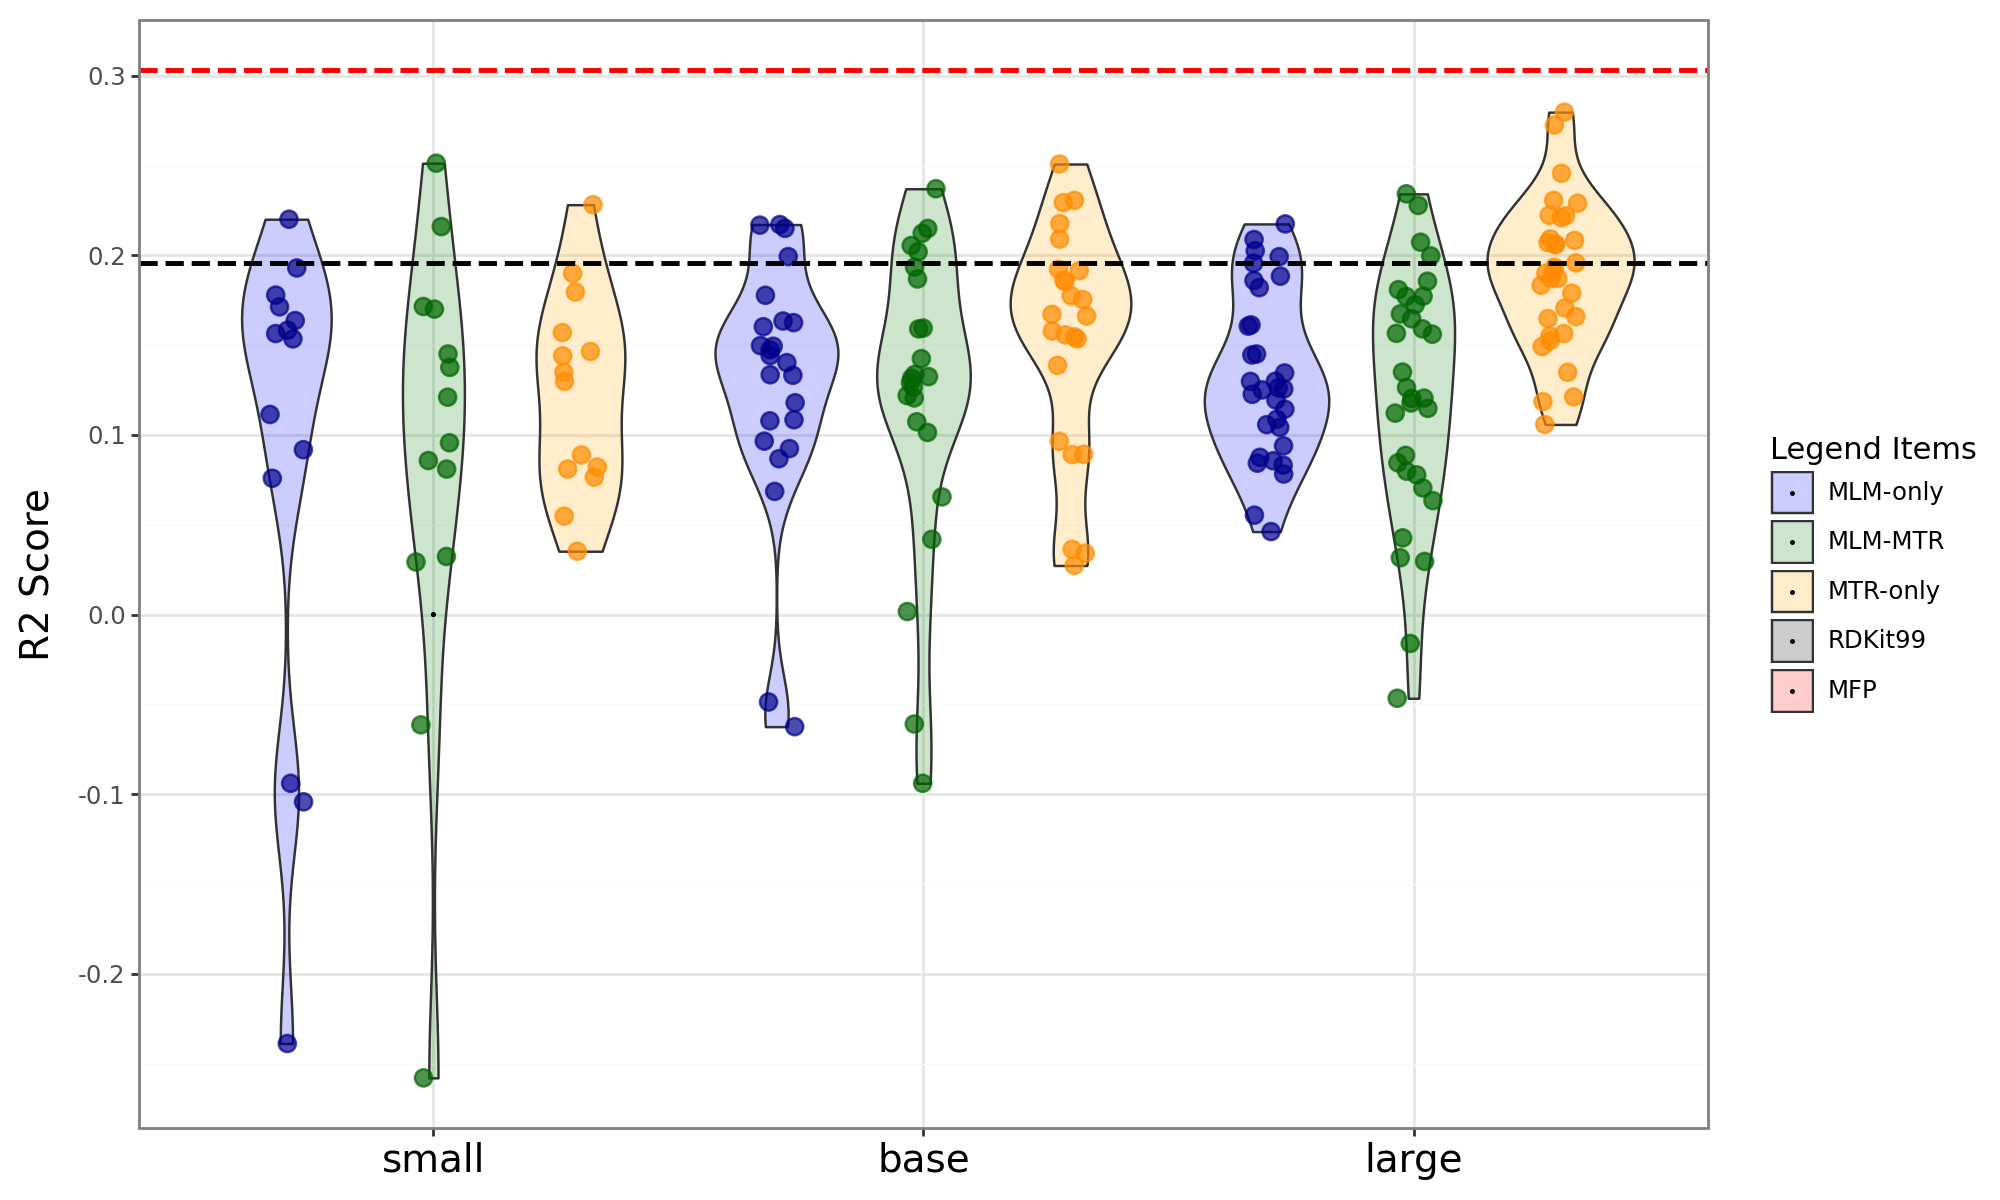

In [109]:
import pandas as pd
import plotnine as p9

# Assume 'lasso_predictions.csv' is in the working directory
try:
    df = pd.read_csv('lasso_predictions.csv')
except FileNotFoundError:
    print("Warning: 'lasso_predictions.csv' not found. Using dummy data for demonstration.")
    data = {
        'Model': ['Model A'] * 30 + ['Model B'] * 30,
        'R2': [0.25 + i/100 for i in range(10)] * 6,
        'Training_method': (['MLM_only'] * 10 + ['MLM-MTR'] * 10 + ['MTR_only'] * 10) * 2
    }
    df = pd.DataFrame(data)


# 1. Ensure Categorical ordering is correct
df['Training_method'] = pd.Categorical(
    df['Training_method'], 
    categories=['MLM_only', 'MLM-MTR', 'MTR_only'], 
    ordered=True
)

# order Small, Base, Large
df['Model'] = pd.Categorical(
    df['Model'], 
    categories=['small', 'base', 'large'], 
    ordered=True
)

# 2. Define Palettes
palette = {'MLM_only': 'blue', 'MLM-MTR': 'green', 'MTR_only': 'orange'}
dark_palette = {'MLM_only': 'darkblue', 'MLM-MTR': 'darkgreen', 'MTR_only': 'darkorange'}

# 3. Define Reference Line Metadata 
line_labels = {
    'line_0.303': 'MFP',
    'line_0.196': 'RDKit99'
}
line_colors = {
    'line_0.303': 'red',     # Color for the line swatch
    'line_0.196': 'black'    # Color for the line swatch
}
line_yintercepts = {'line_0.303': 0.303, 'line_0.196': 0.196}


# --- NEW LOGIC: Single Combined Palette and Labels for the Fill Aesthetic ---
combined_palette = {
    'MLM_only': palette['MLM_only'],
    'MLM-MTR': palette['MLM-MTR'],
    'MTR_only': palette['MTR_only'],
    'line_0.303': line_colors['line_0.303'],  # The fill color doesn't matter much for lines, but must be present
    'line_0.196': line_colors['line_0.196'],
}

combined_labels = {
    'MLM_only': 'MLM-only',
    'MLM-MTR': 'MLM-MTR',
    'MTR_only': 'MTR-only',
    'line_0.303': line_labels['line_0.303'],
    'line_0.196': line_labels['line_0.196']
}

# Dummy dataframe containing the line entries, mapped to fill
line_legend_data = pd.DataFrame({
    'fill_key': ['line_0.303', 'line_0.196'],
    'x_dummy': [1] * 2,
    'y_dummy': [0] * 2
})


# 4. Plot Construction
p = (p9.ggplot(df, p9.aes(x='Model', y='R2')) 
     
    # --- MAIN DATA LAYERS ---
    # 1. Violin (generates the first 3 fill entries in the legend)
    # make trim dark_palette
    + p9.geom_violin(p9.aes(fill='Training_method'), trim=True, alpha=0.2, position=p9.position_dodge(width=0.9))

    # 2. Jitter (Hide its legend)
    + p9.geom_jitter(p9.aes(color='Training_method'), 
                    position=p9.position_jitterdodge(jitter_width=0.2, dodge_width=0.9), 
                    size=3, alpha=0.7, show_legend=False) 
    
    # 3. Invisible points for the remaining 2 fill entries (The Lines)
    # This ensures 'line_0.303' and 'line_0.196' are present in the fill scale's data space
    + p9.geom_point(
        p9.aes(x='x_dummy', y='y_dummy', fill='fill_key'), 
        data=line_legend_data,
        inherit_aes=False,
        size=0
    )
    
    # --- REFERENCE LINES (Hline) ---
    + p9.geom_hline(yintercept=line_yintercepts['line_0.303'], linetype='dashed', color=line_colors['line_0.303'], size=1, show_legend=False)
    + p9.geom_hline(yintercept=line_yintercepts['line_0.196'], linetype='dashed', color=line_colors['line_0.196'], size=1, show_legend=False)
    
    # --- SINGLE CONSOLIDATED LEGEND: FILL SCALE ---
    + p9.scale_fill_manual(
        values=combined_palette,
        labels=combined_labels,
        name='Legend Items',
        # Use guide_legend to specify the appearance of all 5 entries
        guide=p9.guide_legend(
            order=1,
            # Force the first 3 entries to show fill/area, and the last 2 to show a dashed line
            override_aes={
                # Training Methods: Clean squares (shape='s', no stroke/dot)
                'MLM_only': {'shape': 's', 'size': 5, 'color': 'none', 'stroke': 0}, 
                'MLM-MTR': {'shape': 's', 'size': 5, 'color': 'none', 'stroke': 0},
                'MTR_only': {'shape': 's', 'size': 5, 'color': 'none', 'stroke': 0},
                # Reference Lines: Line swatch (shape='None' hides the point, leaving only the dashed linetype)
                'line_0.303': {'shape': 'None', 'fill': 'none', 'color': combined_palette['line_0.303'], 'linetype': 'dashed', 'size': 1.3},
                'line_0.196': {'shape': 'None', 'fill': 'none', 'color': combined_palette['line_0.196'], 'linetype': 'dashed', 'size': 1.3}
            }
        )
    )

    # --- HIDE ALL OTHER SCALES ---
    # FIX: Changed guide='none' to guide=False to resolve 'PlotnineError: guide_none Not in Registry'
    + p9.scale_color_manual(values=dark_palette) 
    
    # --- THEME AND LABELS ---
    + p9.theme_bw()
    # make x-ticks font larger
    + p9.theme(axis_text_x=p9.element_text(size=14, color='black'))
    # make R2 Score y label font larger
    + p9.theme(axis_title_y=p9.element_text(size=14, color='black'))

    + p9.labs(title='', x='', y='R2 Score')
    + p9.theme(figure_size=(10, 6))
)

p

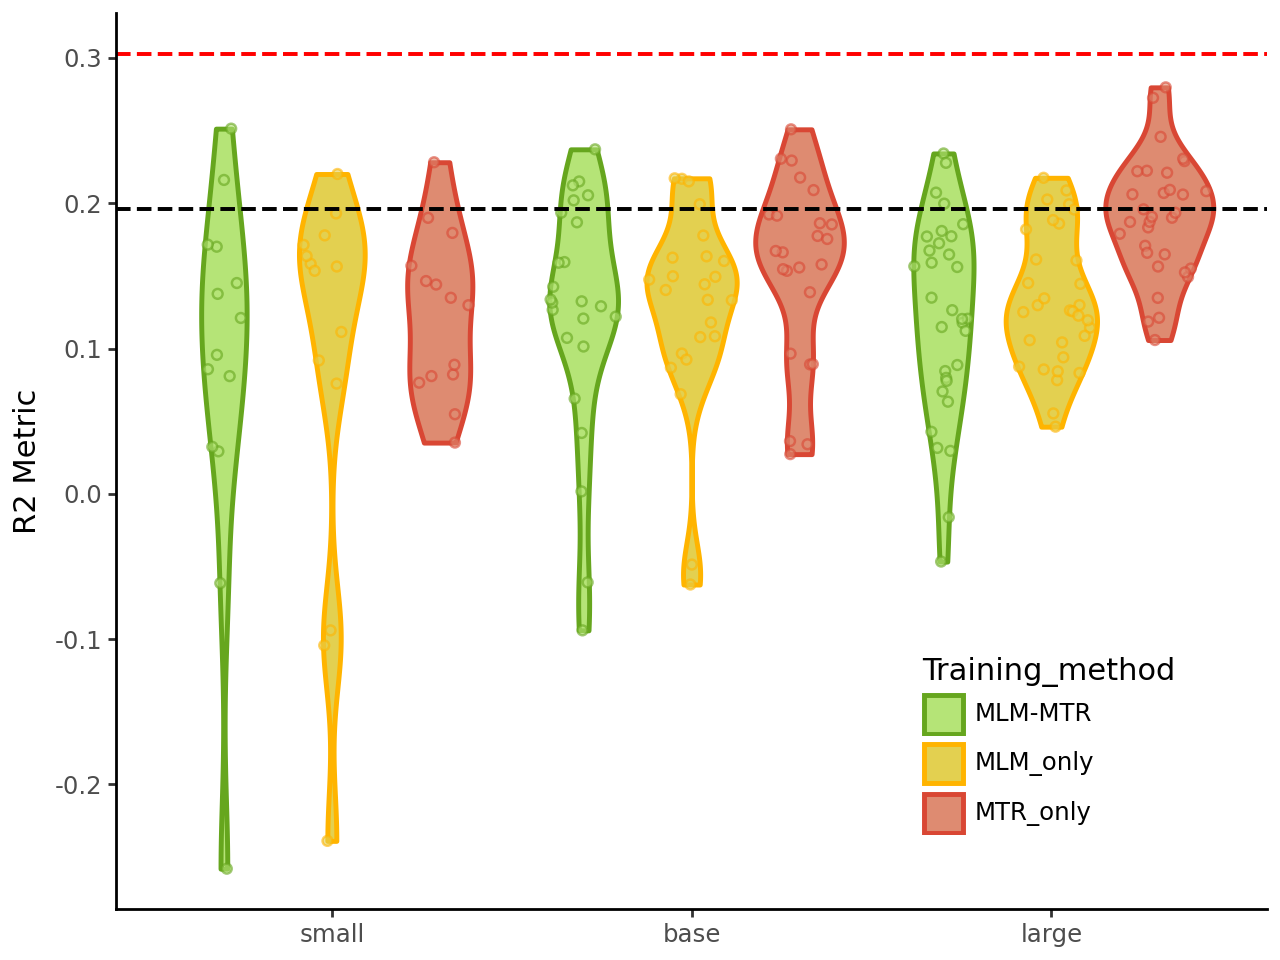

In [ ]:
import pandas as pd
import numpy as np
import plotnine as p9
from plotnine import (
    ggplot,
    aes,
    geom_violin,
    geom_sina,
    geom_hline,
    scale_fill_manual,
    scale_color_manual,
    labs,
    theme_classic,
    theme
)

# Sample Data Creation (Replace this with actual data loading)
df = pd.read_csv('lasso_predictions.csv')

# sort by Model (small, base, large)
df['Model'] = pd.Categorical(
    df['Model'], 
    categories=['small', 'base', 'large'], 
    ordered=True
)

# 2. Define Custom Colors
# We need three colors for the fill (lighter) and three for the outline (darker)
fill_colors = [
    '#B5E477', 
    '#e3d050', 
    '#de8b71'
    ] # Light shades for fill
outline_colors = [
    '#66A61E', 
    '#FFB400', 
    '#D94734'
    ] # Darker shades for outline/sina points

# Combine colors into a single dictionary for easier mapping (optional, but clean)
color_map = {
    'MLM_only': {'fill': fill_colors[0], 'outline': outline_colors[0]},
    'MLM-MTR': {'fill': fill_colors[1], 'outline': outline_colors[1]},
    'MTR_only': {'fill': fill_colors[2], 'outline': outline_colors[2]}
}

# Extract lists for plotnine
fill_list = [v['fill'] for v in color_map.values()]
outline_list = [v['outline'] for v in color_map.values()]

# 3. Create the Plot
plot = (
    ggplot(df, aes(x='Model', y='R2', fill='Training_method', color='Training_method'))
    + geom_violin(
        # The outline border color of the violin
        aes(fill='Training_method', color='Training_method'),
        style='full',
        size=1,
        show_legend=True
    )
    + geom_sina(
        # The points for the sina plot
        aes(color='Training_method', fill='Training_method'),
        size=1.5,
        alpha=0.6,
        show_legend=False
    )
    # MFP Benchmark Line (0.393, Red Dashed)
    + geom_hline(
        yintercept=0.303,
        linetype='dashed',
        size=0.8,
        color='red'  # Explicitly set to red
    )
    # RDKit99 Benchmark Line (0.196, Black Dashed)
    + geom_hline(
        yintercept=0.196,
        linetype='dashed',
        size=0.8,
        color='black' # Explicitly set to black
    )
    
    # Custom color scales for Fill and Outline/Sina
    + scale_fill_manual(values=fill_list)
    + scale_color_manual(values=outline_list)
    # make x-ticks font larger
    + theme(
        axis_text_y=p9.element_text(size=14, color='black'),
        axis_text_x=p9.element_text(size=14, color='black')
        )
    # Labels and Theme
    + labs(
        title='',
        y='R2 Metric',
        x=''
    )
    # add plot size
    + theme_classic()
)

# 4. Display/Save the Plot
plot+theme(legend_position=(0.9, 0.1))
# plot.save('R2_violin_sina_plot.png', width=8, height=6, dpi=300) # Uncomment to save